# Numerikus deriválás és Numerikus integrálás

## Numerikus deriválás

A numerikus deriválás alapfeladata az, hogy az analitikusan ismeretlen vagy nehezen számolható, esetleg csak diszkrét pontokban ismert $f:D(\subseteq \mathbb{R})\rightarrow \mathbb{R}$ függvény deriváltjának kiszámítás egy vagy több pontban.

Többféleképpen indulhatunk neki csinálhatunk egy interpolációt mely közelít az $f$ függvényünkhöz és akkor az interpolációnk $k$-adik deriváltja fog közelíteni az $f$ függvényünkhöz $k$-adik deriváltjához.

Ha $f \in C^2[a,b]$ akkor felírhatjuk rá a másodfokú Taylor polinomot amiből kifejezhetjük az alábbi összefüggést:


$$
f'(x)\approx \frac{f(x+h)-f(x)}{h}
$$

Melynek hibája $O(h)$.
A harmadfokú taylor polinommal még pontosabb közelítést kaphatunk:

$$
f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}
$$

Másodfokú deriváltra alkalmazott összefüggések:

$$
f''(x)\approx \frac{f(x)-2f(x+h)+f(x+2h)}{h^2}
$$

$$
f''(x)\approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
$$

A második képlet a centrális differencia formula. Mind a két képlet hibája $O(h^2)$

ezeknek az implementációja:

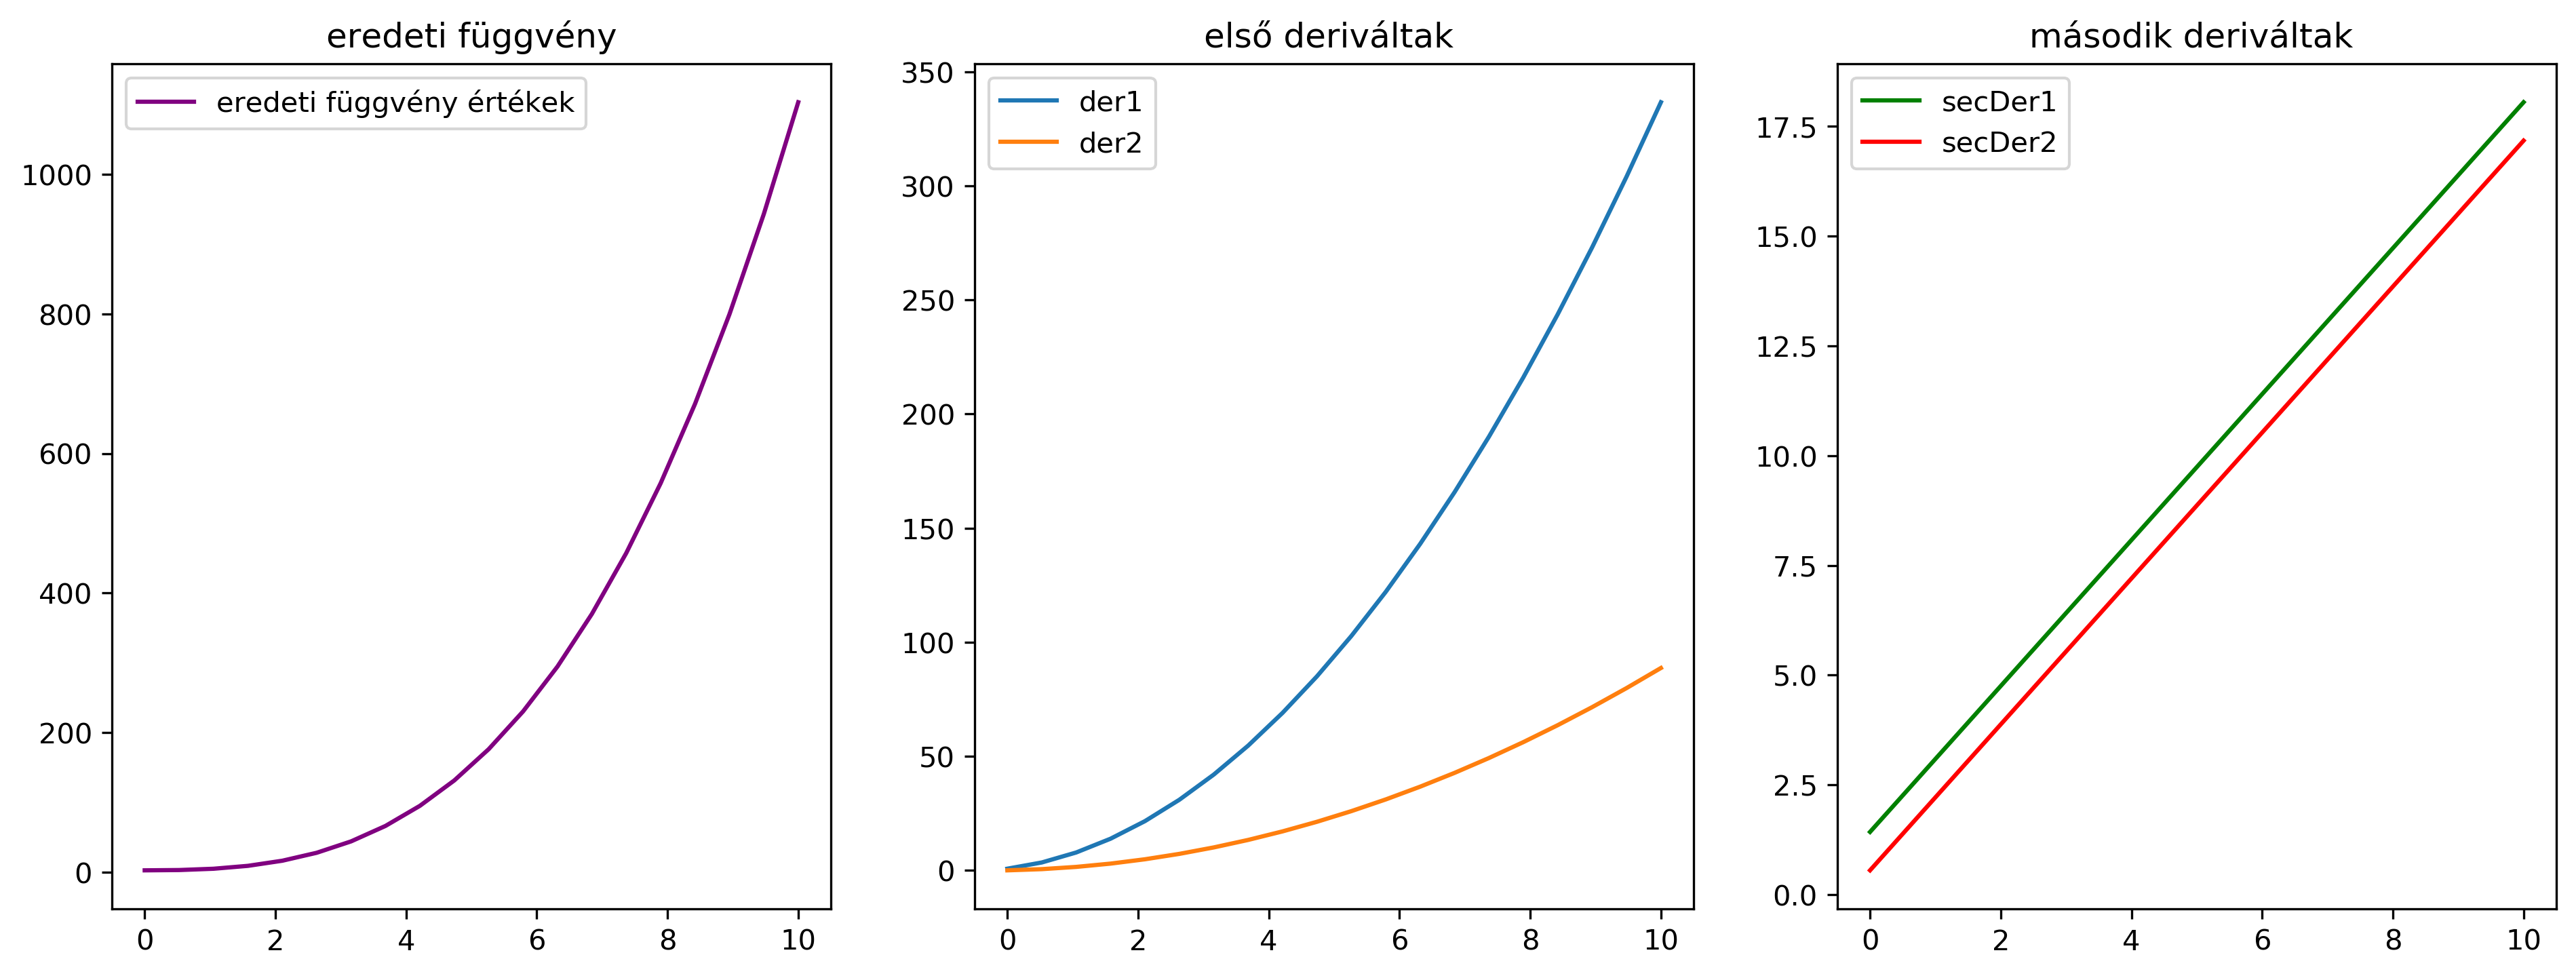

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2+x**3+3

def firstDerivate1(x, h):
    return (f(x+h)-f(x))/h


def firstDerivate2(x, h):
    return (f(x+h)-f(x-h))/2*h


def secondDerivate1(x, h):
    return (f(x)-2*f(x+h)+f(x+2*h))/h*h


def secondDerivate2(x, h):
    return (f(x+h)-2*f(x)+f(x-h))/h*h

def main():
    x=np.linspace(0,10,num=20)
    h=x[1]-x[0]
    y=x**2+x**3+3
    
    der1=np.zeros(20)
    der2=np.zeros(20)
    secder1=np.zeros(20)
    secder2=np.zeros(20)
    
    
    i=0
    while i<20:
        der1[i] = firstDerivate1(x[i], h)
        der2[i] = firstDerivate2(x[i], h)
        secder1[i] = secondDerivate1(x[i], h)
        secder2[i] = secondDerivate2(x[i], h)
        i=i+1
    
    
    plt.figure(figsize=(15.5, 5.5), dpi=300)

    plt.subplot(131)
    plot1=plt.plot(x, y, "purple")
    plt.title("eredeti függvény")
    plt.legend(["eredeti függvény értékek"])
    plt.subplot(132)
    plot2=plt.plot(x, der1)
    plot2=plt.plot(x, der2)
    plt.title("első deriváltak ")
    plt.legend(["der1", "der2"])
    plt.subplot(133)
    plot3=plt.plot(x, secder1, "g")
    plot3=plt.plot(x, secder2, "r")
    plt.title("második deriváltak ")
    plt.legend(["secDer1", "secDer2"])
    
    
    plt.show()
    

    
main()

Interpolációkkal való közelítéshez használható a Newton, Lagrange és a Spline interpoláció is.

## Numerikus integrálás

Numerikus integrálásnál a Newton-Leibnitz formulából indulunk ki. Ha vagy egy $f$ függvény és az Riemann integrálható $[a,b]$-n és itt létezik primitív függvénye, akkor

$$
I=\int^b_a f(x)dx=F(b)-F(a)
$$

Ezt a képletet viszont csak akkor tudjuk alkalmazni ha létezik $f$-nek primitív függvénye egyébként numerikus integrálást kell alkalmaznunk.
Numerikus integrálást úgy tudunk alkalmazni, ha az $f$ függvényünket közelítjük egy $p$ interpolációs polinommal és ezáltal a határozott integrál értékét általános formában közelítjük:

$$
I=\int^b_a f(x)w(x)dx \approx \int^b_a p(x)w(x)dx,\quad \textrm{ ahol a $w(x)\geq0$ egy tetszőleges súlyfüggvény}
$$

Integráláshoz találunk előre megírt függvényeket a scipy.integrate csomagban amik a `quad`, `dblquad`, `tplquad`.
A sima `quad` egy általános esetekben használható függvény a `dblquad` a `quad`-hoz hasonló de kétszeres integrálást végez, míg a `tplquad` pedig háromszorosan integrál.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def f(x):
    return x+x**2+3

def main():
    x=np.linspace(0,10,num=20)
    y=x**2+x**3+3
    
    result= integrate.quad(f, 0,10)
    print(result)

main()

(413.33333333333337, 4.588921835117314e-12)


Vannak persze egyébb algoritmusok is melyeket lehet használni, ilyen a Lagrange formula vagy a zárt vagy nyitott Newton-Cotes formulák is, ezek mellett ott vannak még a Téglalap és Trapéz formulák is. A Newton-Cotes formulákra visszavezethető a Simpson és az érintő formula is. 

Nézzük meg ezek közül először a két legegyszerűbbet a Téglalap formulákat és a Trapéz módszert. Kezdjük a Téglalap formulákkal.
Az $f$ függvény integrálját szeretnénk az $[a,b]$ intervallumon, legyen $h=(b-a)/n$ a lépésköz ekkor az első téglalap formula a következő:

$$
I^{(1)}= h  \sum^{n-1}_{j=0}y_j
$$

a második pedig:

$$
I^{(2)}= h  \sum^{n}_{j=1}y_j
$$

és van egy harmadik is:

$$
I^{(3)}= h  \sum^{n}_{j=1}y_{j-1/2}
$$

Látszik hogy a formulák a téglalapokat illesztenek a függvényre és ezek területének az összege adja meg az integrál értékét.

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    return x+x**2+3

def teglalap1(x, h, n):
    ossz=0
    for i in range(0,n-1):
        ossz=ossz+f(x[i])
        
    return h*ossz

def teglalap2(x, h, n):
    ossz=0
    for i in range(1,n):
        ossz=ossz+f(x[i])
        
    return h*ossz

def teglalap3(x, h, n):
    ossz=0
    for i in range(1,n):
        x1=(x[i-1]+x[i])/2
        ossz=ossz+f(x1)
        
    return h*ossz

def main(numOfPoints):
    
    if(numOfPoints==""):
        n=1
    else:
        n=int(numOfPoints)
    
    a=0
    b=10
    h=(b-a)/n
    x=np.linspace(a,b,num=n)
    y=x+x**2+3
    
    res1=teglalap1(x,h,n)
    res2=teglalap2(x,h,n)
    res3=teglalap3(x,h,n)
    
    
    plt.figure(figsize=(15.5, 5.5), dpi=300)
    plt.bar(x, y, color='g',width=h, align='edge')
    plt.plot(x, y, color='r')
    plt.title("Első téglalap formula")
    plt.legend(["eredeti függvény", "közelítő téglalapok"])
    
    
    print("Első téglalap formula eredménye:\n")
    print(res1)
    print("\nMásodik téglalap formula eredménye:\n")
    print(res2)
    print("\nHarmadik téglalap formula eredménye:\n")
    print(res3)
    
    
interact(main, numOfPoints="");

interactive(children=(Text(value='', description='numOfPoints'), Output()), _dom_classes=('widget-interact',))

Látható hogy nem ugyan azt az eredményt adják, de elég sok alpont esetén az egzakt megoldáshoz tartanak. A téglalap formula hibája az alpontok számától függ lineárisan azaz $O(h)$.

Most nézzük a Trapéz módzser. A trapéz módzsernek van egy egyszerű és egy összetett változata is. Először vegyük az egyszerűt.
Ebben az esetben 1 alpontunk van tehát $h=1$. Legyen $a=x_0$ és $b=x_1$ ekkor:
$$
\int^b_a f(x)dx \approx \frac{y_0+y_1}{2}h
$$

Egyszrű trapéz módszer eredménye:

59.5


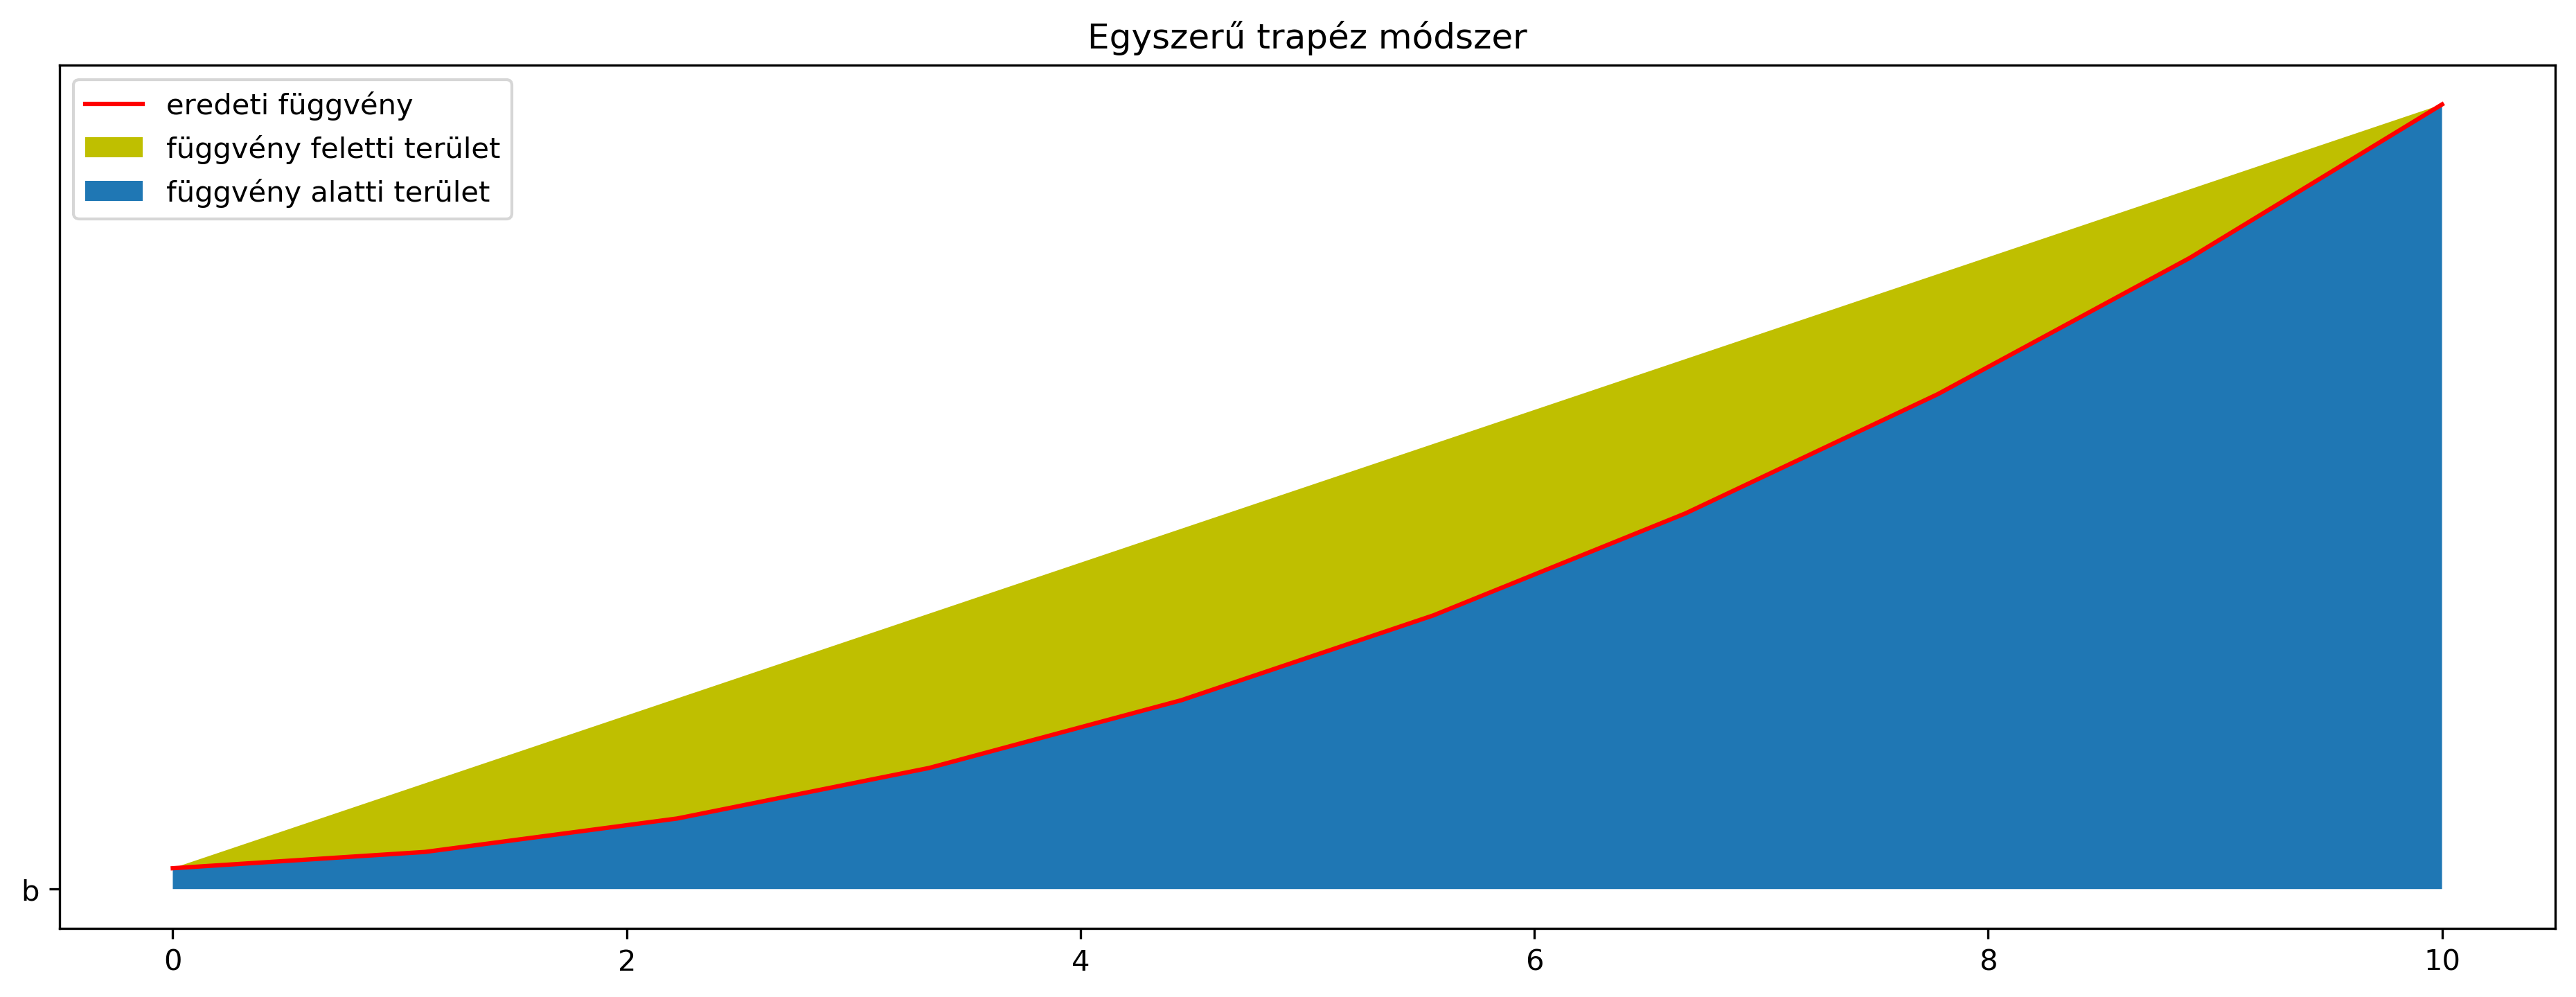

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def f(x):
    return x+x**2+3

def trapezEgyszeru(x, a, b, h):  
    return (f(a)+f(b)/2)*h

def main():
    
    a=0
    b=10
    h=1
    x=np.linspace(a,b,10)
    y=x+x**2+3
    
    res=trapezEgyszeru(x,a,b,h)
    
    
    plt.figure(figsize=(15.5, 5.5), dpi=300)
    
    plt.fill(x, f(x), 'y')
    plt.fill_between(x, f(x),'b', where=x<f(x) )
    plt.plot(x, y, color='r')
    plt.title("Egyszerű trapéz módszer")
    plt.legend(["eredeti függvény", "függvény feletti terület","függvény alatti terület"])
    
    
    print("Egyszrű trapéz módszer eredménye:\n")
    print(res)

main()
    

Látható nem ad pontos eredményt. most nézzük meg az összetett trapéz módszert. Az Összetett trapéz módszer esetén már több alpontuk van tehát $h\geq 1$ és az alábbi képletet alkalmazzuk:

$$
\int^b_a f(x)dx \approx \sum^{n-1}_{j=0}\frac{x_{i+1}-x_i}{2}(y_i+y_{i+1})
$$

In [169]:
import numpy as np

def f(x):
    return x+x**2+3

def trapezOsszetett(x, n):
    ossz=0
    for i in range(0,n-1):
        xi=(x[i+1]-x[i])/2
        ossz=ossz+xi*(f(x[i])+f(x[i+1]))
    
    return ossz


def main():
    
    n=100
    a=0
    b=10
    h=(b-a)/n
    x=np.linspace(a,b,num=n)
    y=x+x**2+3
    
    res1=trapezOsszetett(x,n)
    
    print("Összetett trapézmódszer eredménye 100 alpont esetén:\n")
    print(res1)
    
main()

Összetett trapézmódszer eredménye 100 alpont esetén:

413.35033840084344


Látható ez már sokkal pontosabb eredményt ad, mint az egyszerű trapéz módszer.

Folytassuk az érintő formulával. Az érintő formula egy nyílt Newton-Cotes formula melyre:

$$
\int^b_a f(x)dx \approx (b-a)f( \frac{a+b}{2})
$$

Ez a formula úgy is értelmezhtő, hogy az $f$ függvényünket a középpontjához húzott egyenessel közelítjük az $[a,b]$ intervallumon, és az egyenes alatti területet vesszük. ebből következik, hogy maximum első fokú polinomig pontos. Gyakorlatban nem ezt a képletet szokták alkalmazni, hanem az intervallumot felosztják n egyenlő részre és ezt a képletet alkalmazzák:


$$
\int^b_a f(x)dx \approx \frac{(b-a)}{n}\sum^{n}_{i=1}f( a-\frac{h}{2}+ih)
$$

Nézzük meg ezek implementációját:

In [185]:
import numpy as np
def f(x):
    return x+x**2+3

def erintoEgyszeru(x, a, b):  
    return (b-a)*(f(b+a)/2)

def erintoOsszetett(x, a, b, n, h):
    d=(b-a)/n
    ossz=0
    for i in range(1,n):
        xi=a-(h/2)+(i*h)
        ossz=ossz+f(xi)
    
    return ossz*d

def main():
    
    n=100
    a=0
    b=10
    h=(b-a)/n
    x=np.linspace(a,b,10)
    y=x+x**2+3
    
    res=erintoEgyszeru(x,a,b)
    res2=erintoOsszetett(x, a, b, n, h)
    
    
    print("Egyszrű érintő formula eredménye:\n")
    print(res)
    print("\nŐsszetett érintő formula eredménye 100 alpont esetén:\n")
    print(res2)

main()

Egyszrű érintő formula eredménye:

565.0

Ősszetett érintő formula eredménye 100 alpont esetén:

402.12975000000006


Az egyszerű érintő formula hiba becslése:

$$
\big| \int^a_b f(x)dx-(b-a) f \big( \frac{a+b}{2} \big)\big| \leq \frac {(b-a)^3M_2}{24}.
$$

Végül jöjjön a Simpson formula mely egy zárt Newton-Coats formula melyre $n=2$. ennek is van egyszerő és összetett alakja. Az egyszerű alakhoz 3 alpontra van szükségünk $x_1=a, x_1=\frac {a+b}{2}, x_2=b$ és alakalmazzuk a három pontra támaszkodó Lagrange-féle interpolációs polinomot:

$$
\int^b_a f(x)dx \approx \frac{b-a}{6} [f(a)+4f(\frac{a+b}{2})+f(b)]
$$

Az összetett Simpson formula esetén is az intervallumot felosztjuk $n$ egyenlő részre és akkor ilyen módon változik meg a képletünk:

$$
\int^b_a f(x)dx \approx \sum^{n-1}_{i=0}\frac{x_{i+1}-x_i}{6} [ f(x_i) + 4f( \frac{x_i+x_{i+1}}{2})+ f({x_{i+1}} ) ]
$$

És most nézzük meg az implementációt:

In [197]:
import numpy as np
def f(x):
    return x+x**2+3

def simpsonEgyszeru(x, a, b):  
    return ((b-a)/6) * (f(a)+ 4*f((a+b)/2)+f(b)) 
    
def simpsonOsszetett(x, n):
    ossz=0
    for i in range(0,n-1):
        x1=(x[i+1]-x[i])/6
        x2=(f(x[i])+ 4*f((x[i]+x[i+1])/2)+f(x[i+1]))
        ossz=ossz+(x1*x2)
    
    return ossz
def main():
    
    n=10
    a=0
    b=10
    x=np.linspace(a,b,10)
    y=x+x**2+3
    
    res=simpsonEgyszeru(x,a,b)
    res2=simpsonOsszetett(x, n)
    
    
    print("Egyszrű Simpson formula eredménye:\n")
    print(res)
    print("\nŐsszetett Simpson formula eredménye:\n")
    print(res2)

main()

Egyszrű Simpson formula eredménye:

413.33333333333337

Ősszetett Simpson formula eredménye:

413.3333333333333


A Simpson formula hibája:

$$
\big|\int^a_b f(x)dx- S_n(f)\big| \leq \frac {M_4(b-a)}{32 \cdot 90}h^4 = \frac {M_4(b-a)^5}{2880n^4}
$$